In [12]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import scipy.integrate as integrate
import math
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\Daniel\Desktop\Radwatch\radwatch-analysis")

In [13]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\Daniel\\Desktop\\Radwatch\\radwatch-analysis\\ROI.py'>

In [43]:
spec = Spectrum.from_file(r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-30min.Spe")
#spec_rebin = spec.combine_bins(8)
#spec_rebin.bin_edges_kev *= 8

SpeFile: Reading file C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-30min.Spe


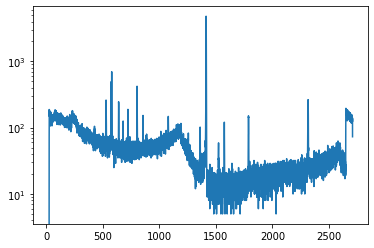

In [46]:
plt.plot(spec.bin_centers_kev, spec.counts_vals)
plt.yscale('log')

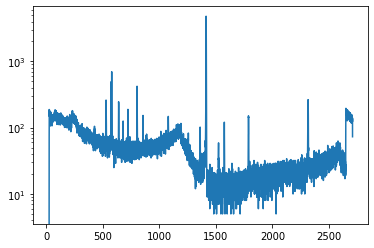

In [47]:
plt.plot(spec.bin_centers_kev, spec.counts_vals)
plt.yscale('log')

In [48]:
kernel = bq.GaussianPeakFilter(4250,30, fwhm_at_0=10)

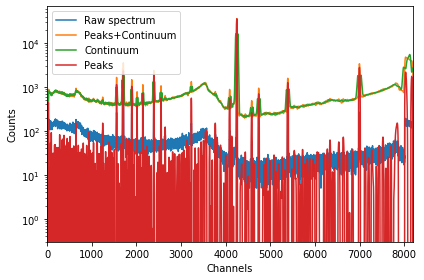

In [54]:
finder = bq.PeakFinder(spec, kernel)

plt.figure()
plt.plot(spec.counts_vals.clip(1e-1), label='Raw spectrum')
plt.plot(finder._peak_plus_bkg.clip(1e-1), label='Peaks+Continuum')
plt.plot(finder._bkg.clip(1e-1), label='Continuum')
plt.plot(finder._signal.clip(1e-1), label='Peaks')
plt.yscale('log')
plt.xlim(0, len(spec))
plt.ylim(3e-1)
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()

[1556.5, 1708.5, 1896.5, 2014.5, 2145.5, 2390.5, 2551.5, 3230.5, 4087.5, 4248.5, 4581.5, 4739.5, 5389.5, 6993.5, 8028.5, 8165.5]
[28.78040124987538, 39.69033246586671, 27.820371001108363, 13.347103825258186, 21.30580264657217, 40.03422006599558, 17.549257559385122, 15.199922835384445, 18.45685591563947, 194.41785622316573, 11.645442054907736, 23.059112618683272, 32.31203855531306, 49.03868224805949, 32.19398610040029, 28.380873368204792]


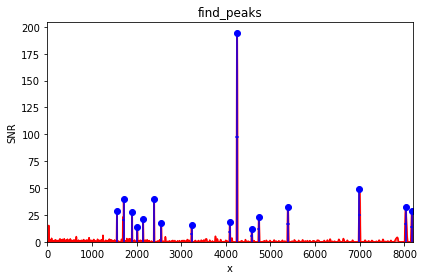

In [67]:
finder.reset()
finder.find_peaks(min_snr=10, xmin=50)
print(finder.channels)
print(finder.snrs)

plt.figure()
plt.title('find_peaks')
finder.plot()
plt.tight_layout()

In [79]:
energies = np.take(spec.bin_edges_kev,finder.channels)
energies

array([ 528.29247183,  578.29385228,  640.13583823,  678.95052094,
        722.04046531,  802.62589662,  855.58016917, 1078.89275808,
       1360.70917292, 1413.64782953, 1523.13736849, 1575.08514294,
       1788.77933248, 2316.00751922, 2656.12969526, 2701.14610969])

In [102]:
import naa_isotope_analyzer
importlib.reload(naa_isotope_analyzer)

<module 'naa_isotope_analyzer' from 'C:\\Users\\Daniel\\Desktop\\Radwatch\\radwatch-analysis\\naa_isotope_analyzer.py'>

In [103]:
df = naa_isotope_analyzer.naa_isotope_analyzer(energies)
df

Backround isotopes [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CD115', 'XE132', 'XE135', 'ND147', 'GD161', 'HO166', 'TL206'], ['TE131', 'BA131', 'ND151', 'PA232'], ['MO101', 'SB124', 'SB124', 'OS185', 'IR194', 'BI210'], ['MO93', 'AG110', 'AG110', 'ND151', 'W187', 'TL206'], ['ZR95', 'RU105', 'AG108', 'IN114', 'SB124', 'CE143', 'EU154'], ['CA47', 'GA72', 'GE77', 'CS134', 'HO166'], ['CD117', 'PA232'], ['GE77', 'SE82', 'RB86', 'SN125', 'EU152', 'YB177'], ['NA24', 'GE77', 'ZR97', 'CD117', 'SB124', 'CS134'], [], ['K42', 'MO101'], ['PR142'], [], ['CD117'], [], []]
Possible isotope br [[27.45+/-0.18, 98.0+/-3.0, 80.4+/-0.4, 13.4+/-0.3, 1.26+/-0.07, 9.46+/-0.16, 1.4+/-0.9], [1.9+/-0.08, 1.224+/-0.014, 1.3+/-0.13, 6.18+/-0.15], [1.21+/-0.05, 25.0+/-6.0, 7.42+/-0.03, 78.0+/-3.0, 1.18+/-0.16, 3.4], [99.9+/-0.8, 10.7+/-0.05, 6.53+/-0.03, 2.38+/-0.15, 33.2+/-0.5, 91.0+/-5.0], [44.27+/-0.22, 47.3, 90.8+/-1.9, 4.4+/-0.6, 10.76+/-0.05, 5.39+/-0.07, 20.06+/-0.19

,isotopes,energies,branching ratios
0,SB124,"[640.1358382343876, 722.0404653101035]","[0.25, 0.1076]"
1,HO166,"[528.2924718275735, 802.6258966214466]","[0.0946, 0.569]"
2,CD117,"[855.5801691744605, 2316.007519221993]","[0.079, 0.0786]"
3,EU152,[1078.8927580765624],[0.1011]
4,AG110,[678.9505209350777],[0.107]
5,PA232,[578.2938522750432],[0.061799999999999994]
6,NA24,[1360.7091729162075],[0.999936]
7,K42,[1523.1373684945133],[0.1808]
